# Propriedades Magnéticas da Matéria

### Modelo de um "material magnético" em 2D

In [ ]:
fazer o gráfico de histerese automaticamente
trocar i,j por l,c

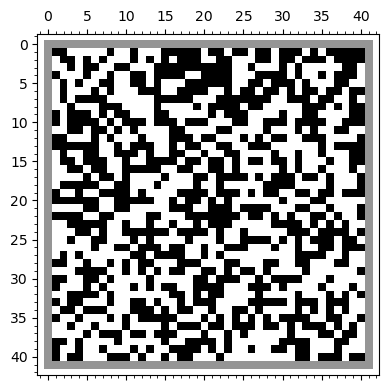

In [197]:
N=40; n=N+2
l=[[randrange(-1,2,2) for k in range(n)] for j in range(n)]
s=matrix(l) # spins matrix
s[:,0]=0; s[:,n-1]=0; s[0,:]=0; s[n-1,:]=0
#pretty_print(s)
matrix_plot(s)

### Magnetização M (unidadeSI = A/m)

In [193]:
def M(s):
    Maux=0
    for i in range(1,N+1):
        for j in range(1,N+1):
            Maux+=s[i,j]
    return(Maux)
print(M(s))

12


### Energia u num sitio

In [235]:
def u(s,i,j):
    return (-J*(s[i][j]*s[i-1][j]+s[i][j]*s[i+1][j]+s[i][j]*s[i][j-1]+s[i][j]*s[i][j+1])-h*s[i][j])

In [244]:
beta=0.1;J=1;h=-8

### Energia Magnética U 

In [249]:
def U(s):
    Uaux=0
    for i in range(1,N+1):
        for j in range(1,N+1):
#            u=-J*(s[i][j]*s[i-1][j]+s[i][j]*s[i+1][j]+s[i][j]*s[i][j-1]+s[i][j]*s[i][j+1])-h*s[i][j]
            #print(i,j,m[i][j],u)
            Uaux+=u(s,i,j)
    return Uaux/2
print(U(s))

-7132


### Evolução Monte Carlo

In [236]:
def omcs(s): # one monte carlo step
    for ai in range(1,N^2+1):
        i=randrange(1,N+1)
        j=randrange(1,N+1)
        #print()
        #print(i,j, "flip")
        u1=u(s,i,j)
        s[i,j]=-s[i,j]
        u2=u(s,i,j)
        du=beta*u2-beta*u1
        if (du > 0):
            if (random()>=exp(-du)):
                #turn flip back
                #print(i,j, "back")
                s[i,j]=-s[i,j]

In [178]:
#from sage.plot.matrix_plot import *

In [245]:
sold=deepcopy(s)
for i in range(N+1): omcs(s)

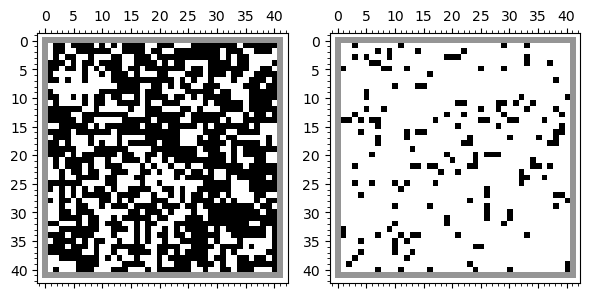

In [246]:
graphics_array((matrix_plot(sold,vmin=-1,vmax=1),matrix_plot(s,vmin=-1,vmax=1)))

### torque

In [103]:
for h in range(10):
    

In [90]:
from sage.plot.plot3d.plot3d import axes

In [150]:
lb=2;ia=0.6;ib=1;iw=2
bc='green';ic='blue';fc1='yellow';fc2='red'
p=line3d(((-ib,-ib,ib),(ib,-ib,-ib),(ib,ib,-ib),(-ib,ib,ib),(-ib,-ib,ib)),thickness=4,color=ic)
#p=line3d(((-1,-1,1),(-1,1,1),(1,1,-1),(1,-1,-1),(-1,-1,1)),thickness=8,color=ic)
p+=arrow3d((0,-ib,0),(ia,-ib,-ia),color=ic,width=iw)
p+=arrow3d((ib,0,-ib),(ib,ia,-ib),color=ic,width=iw)
p+=arrow3d((0,ib,0),(-ia,ib,ia),color=ic,width=iw)
p+=arrow3d((-ib,0,ib),(-ib,-ia,ib),color=ic,width=iw)
l=sum(flatten([[arrow((i,j,-lb),(i,j,+lb),color=bc,opacity=0.3) for j in range(-2,3)] for i in range(-2,3)]))
p+=l
p+=arrow3d((0,ib,0),(0,2*ib,0),color=fc1,width=2)
p+=arrow3d((0,-ib,0),(0,-2*ib,0),color=fc1,width=2)
p+=arrow3d((-ib,0,ib),(-2*ib,0,ib),color=fc2,width=2)
p+=arrow3d((ib,0,-ib),(2*ib,0,-ib),color=fc2,width=2)
p+=axes(2,1)
p+=text3d('B',(1.1,1.1,1.1),fontsize=30,color=bc)
p+=text3d('I',(-0.8,0,1.1),fontsize=30,color=ic)
p+=text3d('𝜃',(-0.2,ib,0.5),fontsize=30,color='black')
show(p,frame=false)

Graphics3d Object

In [74]:
arrow((0,-1,0),(-1,1,1),(1,-1,1)])

Graphics3d Object

In [73]:
[randrange(-1,2,2) for i in range(10)]

[1, 1, -1, 1, 1, 1, 1, -1, 1, 1]